In [19]:
import numpy as np
import pandas as pd
import requests
import streamlit as st
from bs4 import BeautifulSoup
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Init
start_url = 'http://www.bcd-bbn.com/controlers/authenticate.php'
post_params = {'username': 'marwanko', 'password': 'Marwanek1959'}

response = requests.post(start_url, data=post_params)
soup = BeautifulSoup(response.text, 'html.parser')

# Scraping
table = soup.find('table')

headers = []
for i in table.find_all('th')[0: -4]:
    title = i.text
    title = ''.join(title.split())
    headers.append(title)

mydata = pd.DataFrame(columns=headers)

for j in table.find_all('tr')[1:-1]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    row = [r.replace(',', '') for r in row]
    length = len(mydata)
    mydata.loc[length] = row

mydata['Date'] = pd.to_datetime(mydata['Date'], format='%d-%m-%Y')

mydata = mydata.set_index('Date')
mydata = mydata.apply(pd.to_numeric)
mydata = mydata.round(2)
mydata = mydata[['DownloadMB', 'UploadMB', 'TotalMB']] 

In [16]:
mydata

,DownloadMB,UploadMB,TotalMB
Date,,,
2022-01-01,28840.76,1645.14,30485.90
2022-01-02,49861.78,4095.32,53957.10
2022-01-03,68466.93,3822.18,72289.11
2022-01-04,43569.71,2930.56,46500.26
2022-01-05,51621.35,6621.93,58243.28
2022-01-06,58260.84,8086.78,66347.62
2022-01-07,44624.06,1605.69,46229.75
2022-01-08,76390.10,2021.78,78411.88
2022-01-09,55647.91,13128.52,68776.43


In [42]:
chartData = pd.DataFrame(columns=['Downloads', 'Uploads'])
chartData['Downloads'] = mydata.DownloadMB[:-1]
chartData['Uploads'] = mydata.UploadMB[:-1]
chartData.set_index(mydata.index[:-1], inplace=True)

In [43]:
chartData

,Downloads,Uploads
Date,,
2022-01-01,28840.76,1645.14
2022-01-02,49861.78,4095.32
2022-01-03,68466.93,3822.18
2022-01-04,43569.71,2930.56
2022-01-05,51621.35,6621.93
2022-01-06,58260.84,8086.78
2022-01-07,44624.06,1605.69
2022-01-08,76390.10,2021.78
2022-01-09,55647.91,13128.52


In [37]:
matplotlib.style.use('ggplot')

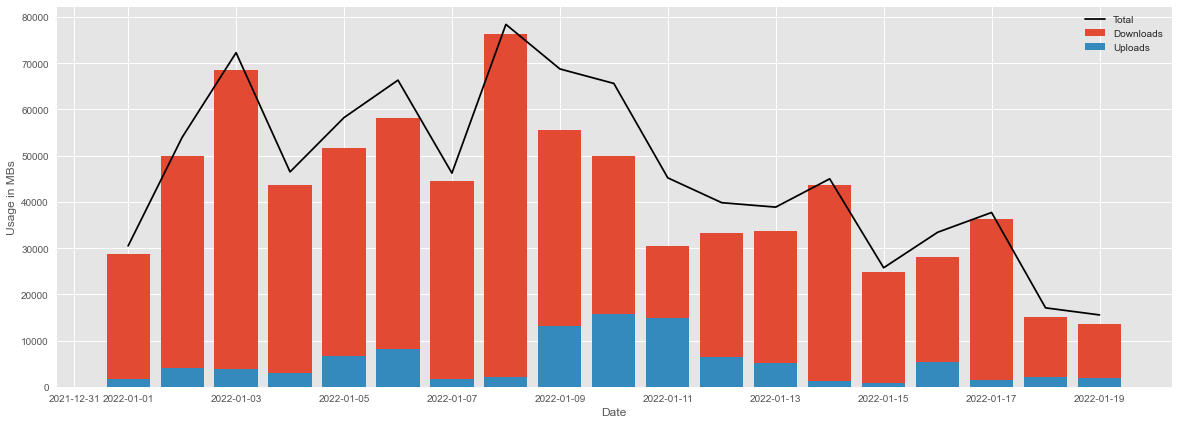

In [40]:
fig, ax = plt.subplots(figsize=(20,7))

ax.bar(mydata.index, mydata.DownloadMB, label='Downloads')
ax.bar(mydata.index, mydata.UploadMB, label='Uploads')
ax.plot(mydata.index, mydata.TotalMB, label='Total', c='black')

ax.legend()

ax.set_ylabel('Usage in MBs')
ax.set_xlabel('Date')

plt.show()

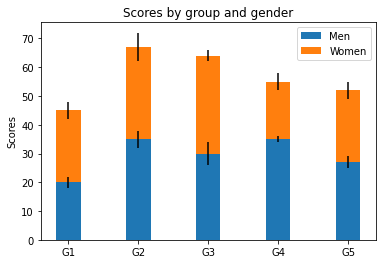

In [5]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()